In [62]:
# import all of the things that will be used
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

There is 8 of them.
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

(1348, 62, 47)


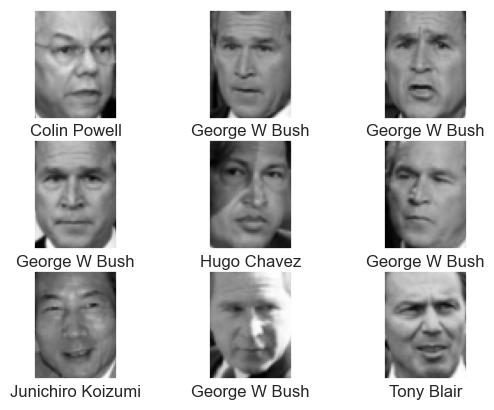

In [51]:
# look more into the data and print out some of the faces
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print()
print(f"There is {len(faces.target_names)} of them.")
print(faces.target_names)
print()
print(faces.images.shape)

fig, ax = plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]])

In [67]:
# use DataFrame to visualize how the data will be stored
pd.DataFrame(faces.data)

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,138.000000,135.666672,127.666664,120.666664,117.000000,119.666664,126.000000,133.333328,138.000000,143.666672,...,113.000000,24.666666,4.666667,2.666667,1.333333,0.333333,1.333333,1.666667,1.666667,0.333333
1,71.333336,56.000000,67.666664,91.333336,91.666664,72.333336,101.666664,124.666664,124.333336,127.666664,...,236.666672,248.333328,252.666672,253.333328,253.000000,253.666672,251.666672,247.666672,243.000000,238.333328
2,84.333336,97.333336,72.333336,56.666668,95.333336,118.333336,123.666664,128.666672,130.333328,134.666672,...,83.333336,91.000000,106.666664,116.000000,123.000000,118.333336,102.000000,114.000000,194.333328,241.000000
3,68.333336,81.666664,121.666664,135.000000,138.666672,141.333328,142.000000,148.333328,159.666672,171.000000,...,90.000000,104.000000,165.000000,224.000000,232.333328,228.666672,230.000000,229.333328,224.333328,206.666672
4,56.666668,55.333332,47.333332,47.000000,50.000000,44.666668,44.666668,52.000000,62.333332,55.000000,...,41.666668,39.666668,37.333332,34.333332,34.000000,34.333332,34.333332,34.666668,35.666668,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,44.333332,46.000000,45.333332,58.000000,80.333336,112.333336,146.666672,168.000000,175.000000,178.666672,...,80.333336,94.666664,89.666664,91.666664,94.000000,90.333336,86.333336,87.000000,94.333336,116.333336
1344,86.333336,83.333336,76.333336,74.333336,87.666664,114.000000,144.666672,167.333328,180.333328,183.666672,...,52.333332,50.666668,46.333332,42.333332,40.666668,41.333332,43.666668,48.000000,49.000000,40.666668
1345,29.333334,29.000000,29.333334,48.666668,90.666664,96.000000,85.000000,78.666664,123.000000,156.333328,...,133.666672,134.000000,132.666672,134.333328,141.000000,147.666672,145.000000,145.000000,147.000000,141.666672
1346,49.333332,55.666668,76.666664,89.666664,76.666664,75.333336,98.666664,118.333336,111.000000,82.000000,...,157.000000,169.000000,170.666672,174.000000,184.333328,202.000000,200.666672,186.333328,176.333328,161.000000


In [50]:
# show one of the faces
# plt.imshow(faces.images[0], cmap='gray')
# plt.axis('off')
# plt.show()

In [69]:
# Use pipeline to combine pca and svc
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [70]:
# split the training and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)

In [72]:
# use grid search to find the optimal svc_c and svc_gamma and fit the data
param_grid = {'svc__C': [1, 5, 8, 10, 20, 50],
              'svc__gamma': [0.00001, 0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 5min 5s, sys: 4min 46s, total: 9min 52s
Wall time: 1min 45s
{'svc__C': 8, 'svc__gamma': 0.001}


In [73]:
# find the prediction
model = grid.best_estimator_
yfit = model.predict(Xtest)

# print(classification_report(ytest, yfit,
#                             target_names=faces.target_names))

In [74]:
# print out how accurate the prediction is
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.82      0.87      0.84        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.82      0.78      0.80        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.82      0.84      0.82       337
     weighted avg       0.85      0.85      0.85       337



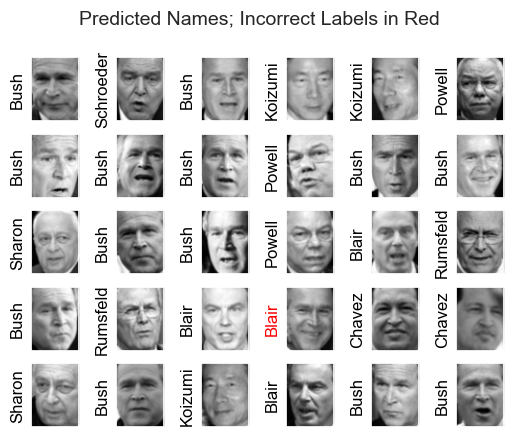

In [78]:
# graph the ones correct in black and incorrect in red
fig, ax = plt.subplots(5, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

2914


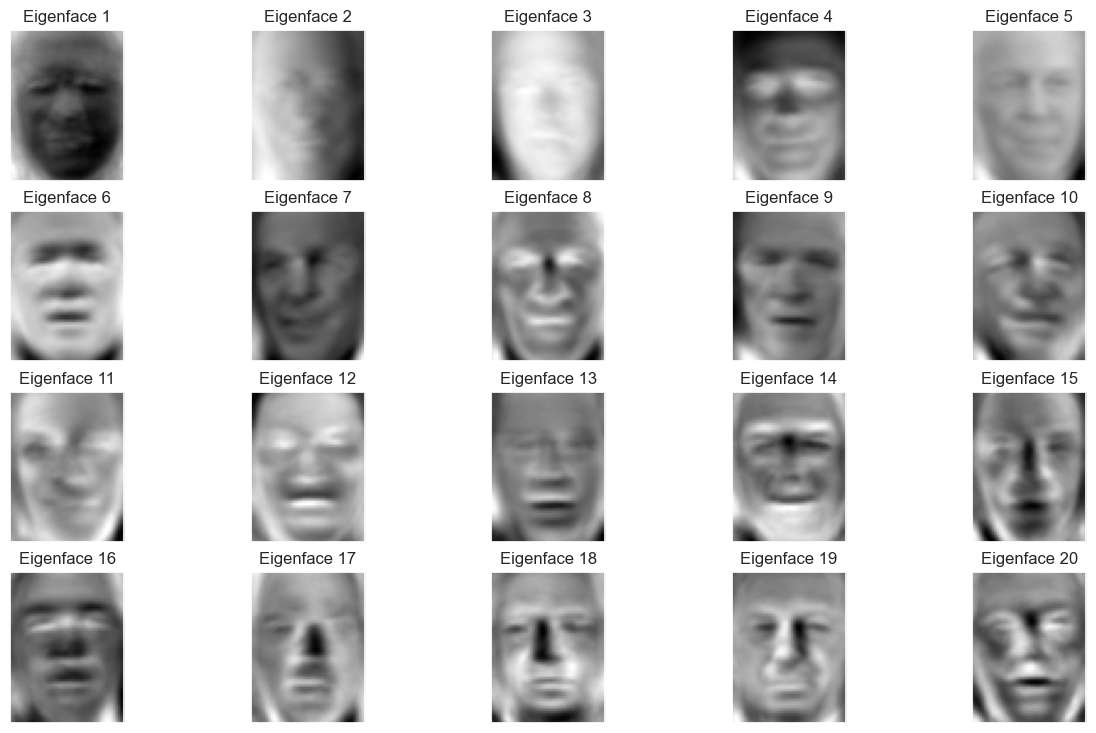

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
n_samples, n_features = X.shape

image_shape = (62, 47)
X = X[:, :np.prod(image_shape)]

print(len(X[0]))

n_components = 150 
pca = PCA(n_components=n_components, whiten=True, random_state=42)
pca.fit(X)

eigenfaces = pca.components_.reshape((n_components, *image_shape))

n_eigenfaces_to_show = 20
fig, axes = plt.subplots(4, 5, figsize=(15, 9),
                         subplot_kw={'xticks': [], 'yticks': []},
                         )

# printing out the eigenfaces
for i, ax in enumerate(axes.flat):
    if i < n_eigenfaces_to_show:
        ax.imshow(eigenfaces[i], cmap='gray')
        axi.set(xticks=[], yticks=[])
        ax.set_title(f'Eigenface {i + 1}')

plt.show()


[57.134377 55.318623 56.612778 ... 54.4052   45.913624 40.372246]
[ 90.95947  93.83454  99.57939 ... 118.18969 111.79438 105.83602]


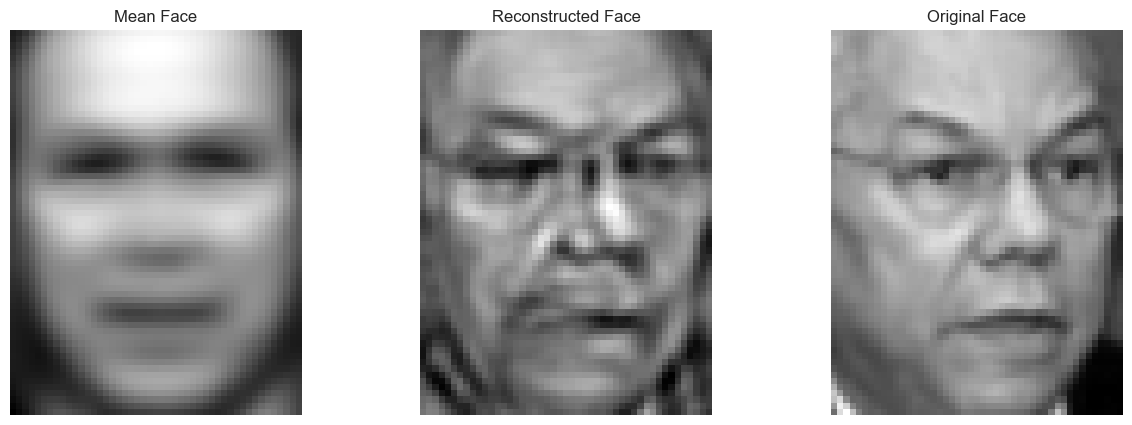

[39.0768   40.983482 47.349396 ... 61.507385 72.2516   85.91258 ]
[ 90.95947  93.83454  99.57939 ... 118.18969 111.79438 105.83602]


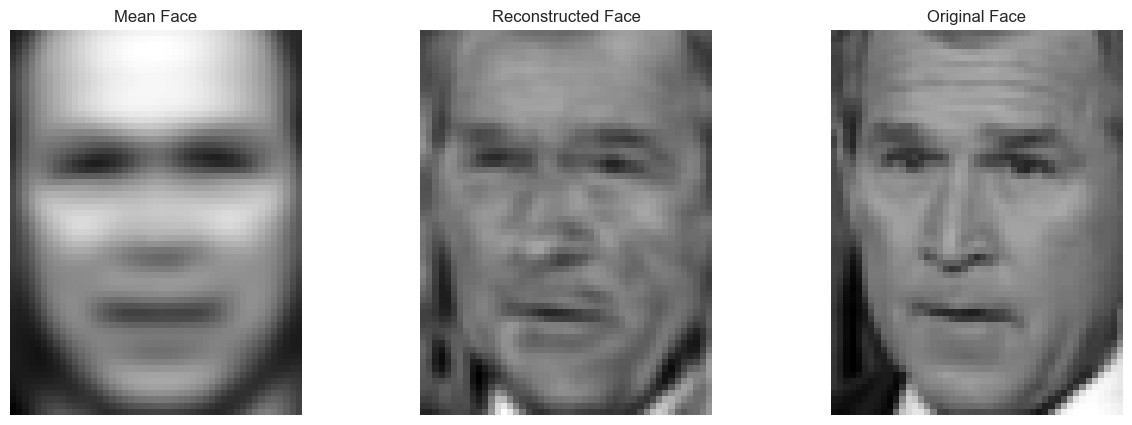

[ 45.70433   43.574112  37.24585  ...  40.64325   83.7939   112.73185 ]
[ 90.95947  93.83454  99.57939 ... 118.18969 111.79438 105.83602]


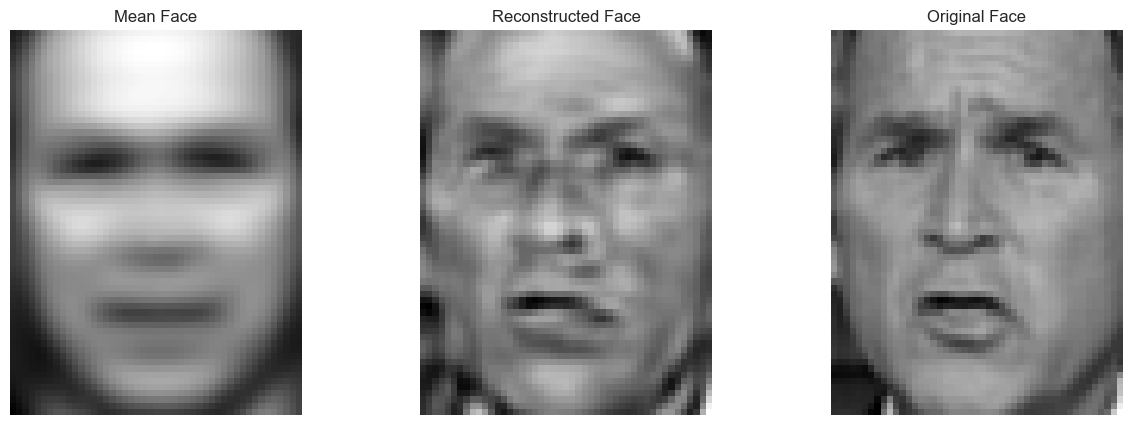

[46.705566 45.29991  47.69182  ... 62.307213 72.212845 69.25908 ]
[ 90.95947  93.83454  99.57939 ... 118.18969 111.79438 105.83602]


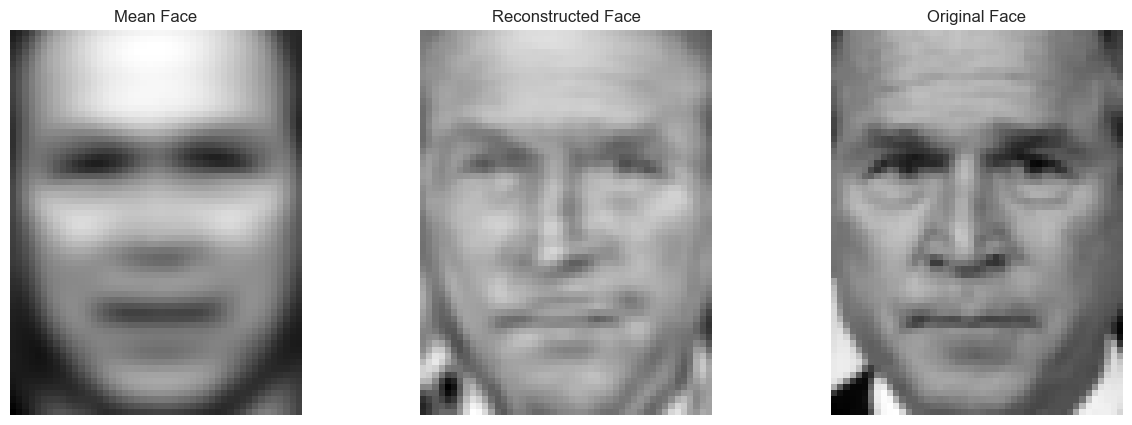

[55.265144 54.466076 48.396503 ... 49.671627 40.631996 45.241104]
[ 90.95947  93.83454  99.57939 ... 118.18969 111.79438 105.83602]


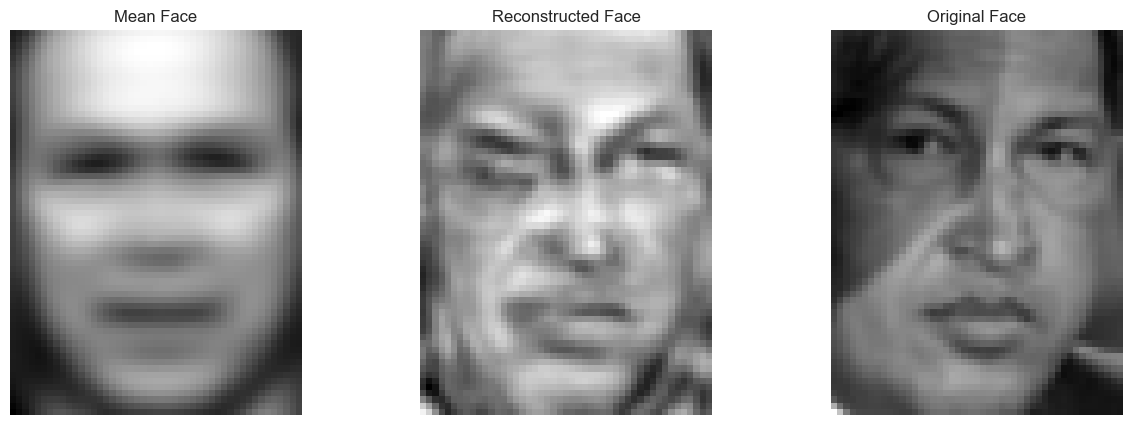

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
lfw_people = fetch_lfw_people(min_faces_per_person=60)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_features = X.shape[1]

mean_face = np.mean(X, axis=0)

X_centered = X - mean_face

n_components = 150
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_centered)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_projected = pca.transform(X_centered)


# to rebuild the face with pca component and mean face
for i in range(5):
    index = i

    coefficients = X_projected[index]

    reconstructed_face = 50*np.dot(coefficients, pca.components_) + 0.5*mean_face
    print(reconstructed_face)
    print(mean_face)

    reconstructed_face_image = reconstructed_face.reshape(h, w)
    mean_face_image = mean_face.reshape(h, w)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(mean_face_image, cmap='gray')
    axes[0].set_title('Mean Face')
    axes[0].axis('off')
    
    axes[1].imshow(reconstructed_face_image, cmap='gray')
    axes[1].set_title('Reconstructed Face')
    axes[1].axis('off')

    axes[2].imshow(lfw_people.images[index], cmap='gray')
    axes[2].set_title('Original Face')
    axes[2].axis('off')

    plt.show()